## TASK 2 : Predicting using Unsupervised Machine Learning

In this task it is required to predict the optimum number of cluster for the iris data set consists of 3 types of flower namely Iris-setosa, Iris-versicolor and Iris-virginica

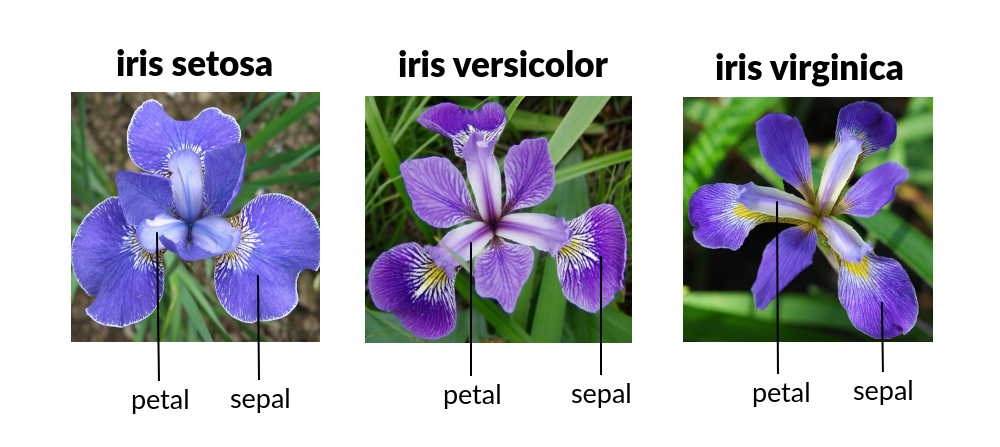

## STEPS :
  * Step 1 : Importing the dataset
  * Step 2 : Visualising the data
  * Step 3 : Finding the optimum number of cluster
  * Step 4 : Appling k- means clustering on the data
  * Step 5 : Visualising the clusters

## Author : Kamya

## STEP 1 : Importing the data

In this step we will import the required libraries and data set witn the help of pandas library

In [20]:
# importing required libraries


import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets
from sklearn.cluster import KMeans
import seaborn as sns
%matplotlib inline

# to ignore the warnings
import warnings as wg
wg.filterwarnings('ignore')

In [2]:
# Reading the iris data set

df = pd.read_csv('Iris.csv')

In [3]:
# Having a glance of dataset 

df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


## STEP 2 : Visualising the data

In this step we will try to visualze the data

In [5]:
df.shape

(150, 6)

In [6]:
df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [7]:
df['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [9]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [10]:
# now we wil drop the label column as it is an unsupervised learning problem


iris = pd.DataFrame(df)
iris_df = iris.drop(columns = ['Species', 'Id'])
iris_df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


## Using Pairplots for better understanding of the data points distribution

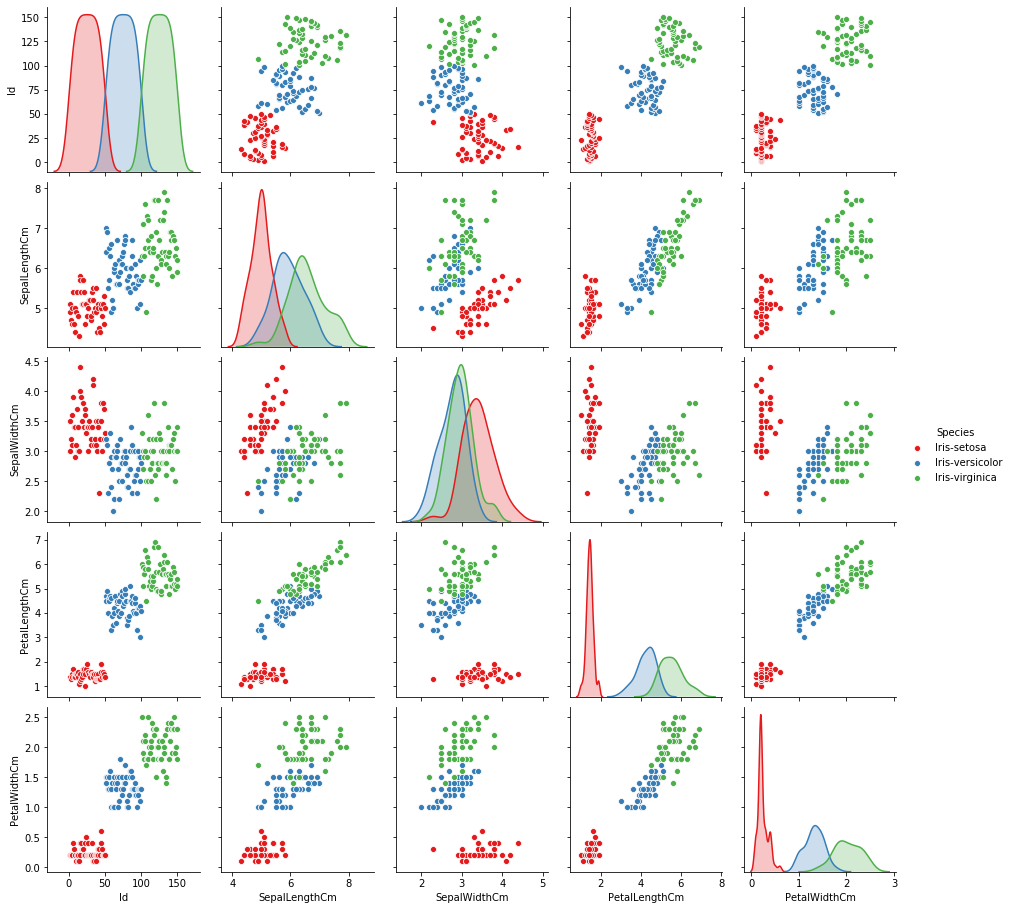

In [16]:
sns.pairplot(data=iris,hue="Species",palette="Set1")
plt.show()

## PairPlot insights
1.petal-length and petal-width seem to be positively correlated(seem to be having a linear relationship).

2.Iris-Setosa seems to have smaller petal length and petal width as compared to others.

3.Looking at the overall scenario, it seems to be the case that Iris-Setosa has smaller dimensions than other flowers.

## STEP 3 : Finding the optimum number of clusters

Before clustering the data using k-means we need to specify the number of clusters In oder to find the optimum number of clusters, therse are various method available Silhouette Coefficient and the Elbow method. Here, the Elbow method is used.

## Breief about Elbow Method

In this method the number of clusters are varies within certain range. For each number, within cluster sum of square (wcss) value is calculated and stored in a list. These values are then plotted against the range of number of clusters used before. The location of bend in the 2nd plot indicate the appropiate number of clusters.

In [11]:
# Calculating the within-cluster sum of square

within_cluster_sum_of_square = []

clusters_range = range(1,15)
for k in clusters_range:
    km = KMeans(n_clusters=k)
    km = km.fit(iris_df)
    within_cluster_sum_of_square.append(km.inertia_)

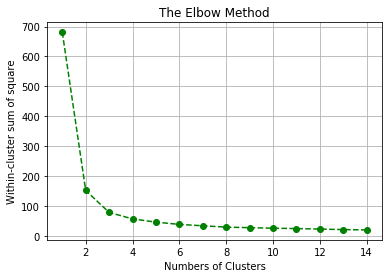

In [12]:
# Plotting the "within-cluster sum of square" against clusters range

plt.plot(clusters_range, within_cluster_sum_of_square, 'go--', color ='green')
plt.title('The Elbow Method')
plt.xlabel('Numbers of Clusters')
plt.ylabel('Within-cluster sum of square')
plt.grid()
plt.show()


we can see why it is called "The Elbow method" from the above graph, the optimum clusters is where elbow occurs. This is when the within cluster sum of squares(WCSS) doesn't derease significantly with every iterartion 

## STEP 4: Applying k - means clusting on data

In [13]:
from sklearn.cluster import KMeans

model = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
predictions = model.fit_predict(iris_df)

## STEP 5: Visualising the Clusters

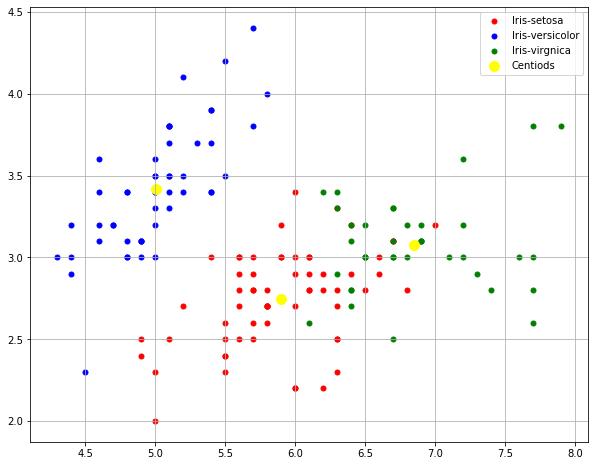

In [14]:
plt.figure(figsize=[10,8])
x = iris_df.iloc[: , [0, 1, 2, 3]].values
plt.scatter(x[predictions == 0,0], x[predictions == 0,1], s = 25, c= 'red', label ='Iris-setosa')
plt.scatter(x[predictions == 1,0], x[predictions == 1,1], s = 25, c= 'blue', label ='Iris-versicolor')
plt.scatter(x[predictions == 2,0], x[predictions == 2,1], s = 25, c= 'green', label ='Iris-virgnica')



# Plotting the cluster centers


plt.scatter(model.cluster_centers_[:,0],model.cluster_centers_[:,1],s= 100, c ='yellow', label = 'Centiods')
plt.legend()
plt.grid()
plt.show()

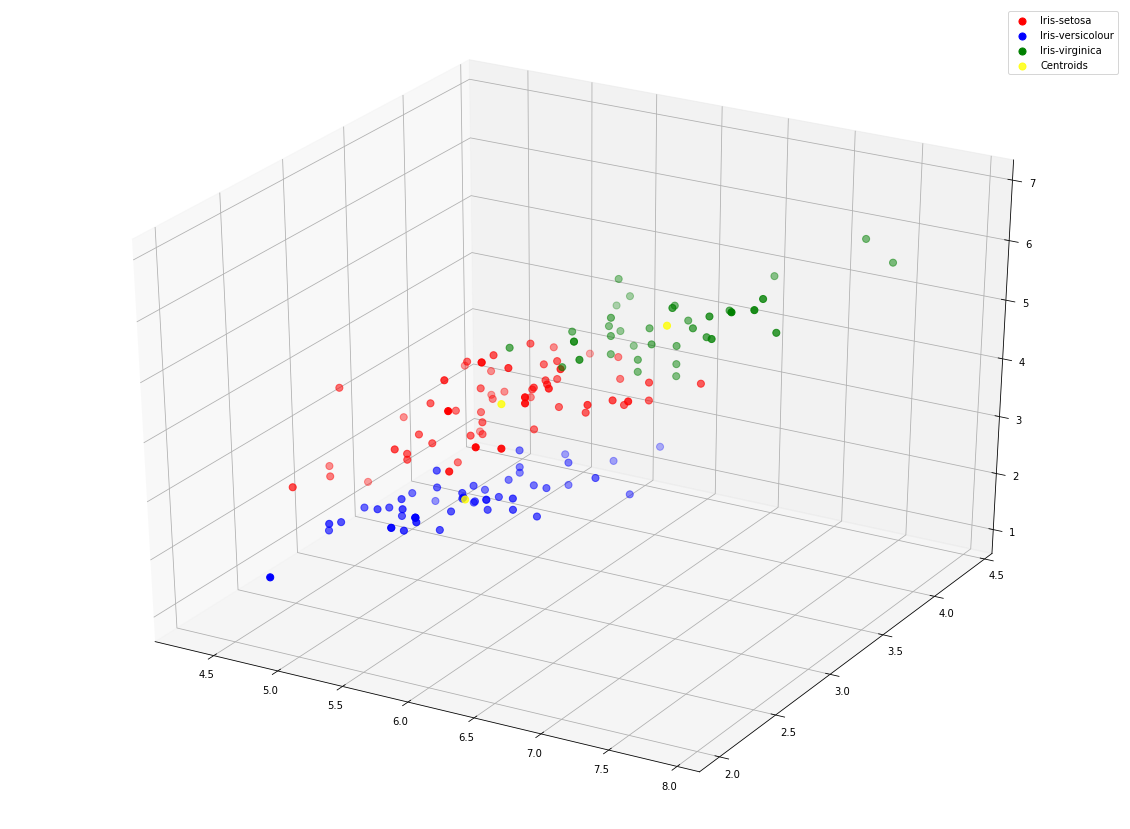

In [26]:
# 3d scatterplot using matplotlib
from mpl_toolkits.mplot3d import Axes3D

plt.figure(figsize=[20,15])
ax = plt.axes(projection ="3d")
ax.scatter3D(x[predictions == 0, 0], x[predictions == 0, 1], x[predictions == 0, 2], 
             s = 50, c = "red", label = 'Iris-setosa')
ax.scatter3D(x[predictions == 1, 0], x[predictions == 1, 1], x[predictions == 1, 2], 
             s = 50, c = 'blue', label = 'Iris-versicolour')
ax.scatter3D(x[predictions == 2, 0], x[predictions == 2, 1], x[predictions == 2, 2], 
             s = 50, c = 'green', label = 'Iris-virginica')

ax.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:,1], model.cluster_centers_[:,2],
            s = 50, c = 'yellow', label = 'Centroids', alpha = 0.8)

plt.legend()
plt.show()

## THANK YOU :))